#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix,log_loss,cohen_kappa_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#### Read the data

Load the csv file and print the first five observations.

In [2]:
df =pd.read_csv('rainfall_prediction.csv')
df.head()

,Obs_Id,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
0,1,3.6,1.0,3.0,14.225,12.333333,82.0,1028.10,0
1,2,0.0,7.2,4.9,23.075,44.333333,69.5,1015.65,1
2,3,0.0,0.6,1.5,10.175,16.666667,87.0,1026.45,0
3,4,0.8,2.4,0.5,19.000,42.666667,89.0,1010.05,1
4,5,40.4,3.0,3.6,18.725,35.333333,81.5,1005.60,0


**The data definition is as follows:** <br>

**Obs_Id:** Observation Id

**Rainfall:** Rainfall recorded in a day (in mm) 

**Evaporation:** Number of field goals made 

**Sunshine:** Number of hours of bright sunshine per day

**Temp:** Temperature in degree C

**Wind_Speed:** Average speed of the wind in km/hour

**Humidity:** Humidity in percentage (%)

**Pressure:** Atmospheric pressure in hpa (hecto Pascals)

**Rain Tomorrow:** Whether it will rain or not(0 = No, it won't rain tomorrow, 1 = Yes, it will rain tomorrow) (target/dependent variable)

In [3]:
df.shape

(1520, 9)

In [4]:
df.isnull().sum()

Obs_Id          0
Rainfall        0
Evaporation     0
Sunshine        0
Temp            0
Wind_Speed      0
Humidity        0
Pressure        0
RainTomorrow    0
dtype: int64

In [5]:
df.dtypes

Obs_Id            int64
Rainfall        float64
Evaporation     float64
Sunshine        float64
Temp            float64
Wind_Speed      float64
Humidity        float64
Pressure        float64
RainTomorrow      int64
dtype: object

Our objective is to predict whether it will rain tomorrow or not.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify and remove the variables in the data which are insignificant for the classification analysis</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df.describe()

,Obs_Id,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,760.500000,2.163553,5.530592,7.895789,19.592681,24.798026,57.432895,1016.246546,0.190789
std,438.930518,7.322329,3.639993,3.689090,6.380897,8.653705,17.939610,6.958099,0.393053
min,1.000000,0.000000,0.200000,0.000000,4.950000,5.666667,6.000000,979.750000,0.000000
25%,380.750000,0.000000,2.800000,5.400000,14.493750,18.666667,46.500000,1011.400000,0.000000
50%,760.500000,0.000000,5.000000,8.800000,19.312500,23.500000,59.000000,1016.050000,0.000000
75%,1140.250000,0.600000,7.400000,10.800000,24.825000,29.666667,70.000000,1020.800000,0.000000
max,1520.000000,109.600000,28.000000,14.000000,36.575000,64.333333,100.000000,1036.200000,1.000000


- Dropping Obs_Id being just number of observations.

In [7]:
df.drop('Obs_Id',axis=1,inplace=True)

<Axes: >

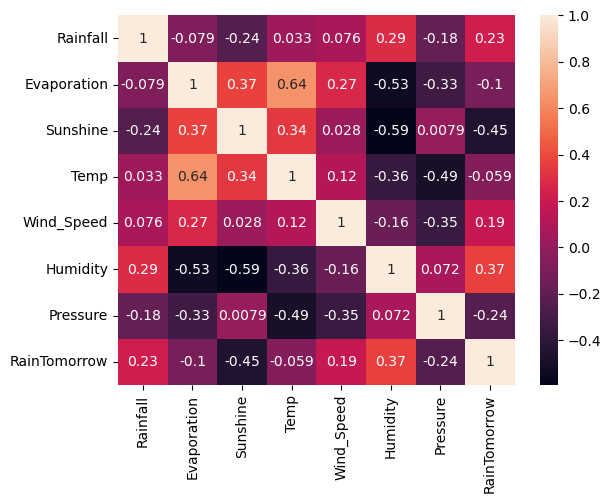

In [8]:
sns.heatmap(df.corr(),annot=True)

- Temp also has very less Correlation -0.05 with rain so can be dropped. but will keep it at this stage.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there any record that is recorded more than once? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df.duplicated().sum()

20

In [10]:
df.drop_duplicates(inplace=True,keep='first')

In [11]:
df.shape             # Note 20 records are dropped.

(1500, 8)

In [32]:
df.reset_index(drop=True,inplace=True)

In [35]:
df

,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
0,3.6,1.0,3.0,14.225,12.333333,82.0,1028.10,0
1,0.0,7.2,4.9,23.075,44.333333,69.5,1015.65,1
2,0.0,0.6,1.5,10.175,16.666667,87.0,1026.45,0
3,0.8,2.4,0.5,19.000,42.666667,89.0,1010.05,1
4,40.4,3.0,3.6,18.725,35.333333,81.5,1005.60,0
...,...,...,...,...,...,...,...,...
1495,0.0,9.2,7.9,22.900,23.333333,59.0,1020.65,0
1496,15.6,6.0,8.2,29.875,23.333333,69.5,1007.00,0
1497,0.0,3.0,9.5,17.925,22.666667,50.5,1012.70,1
1498,0.0,7.2,10.1,22.100,21.000000,65.5,1015.10,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any outliers present in the data? If yes, remove such observations using the quartiles of the variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

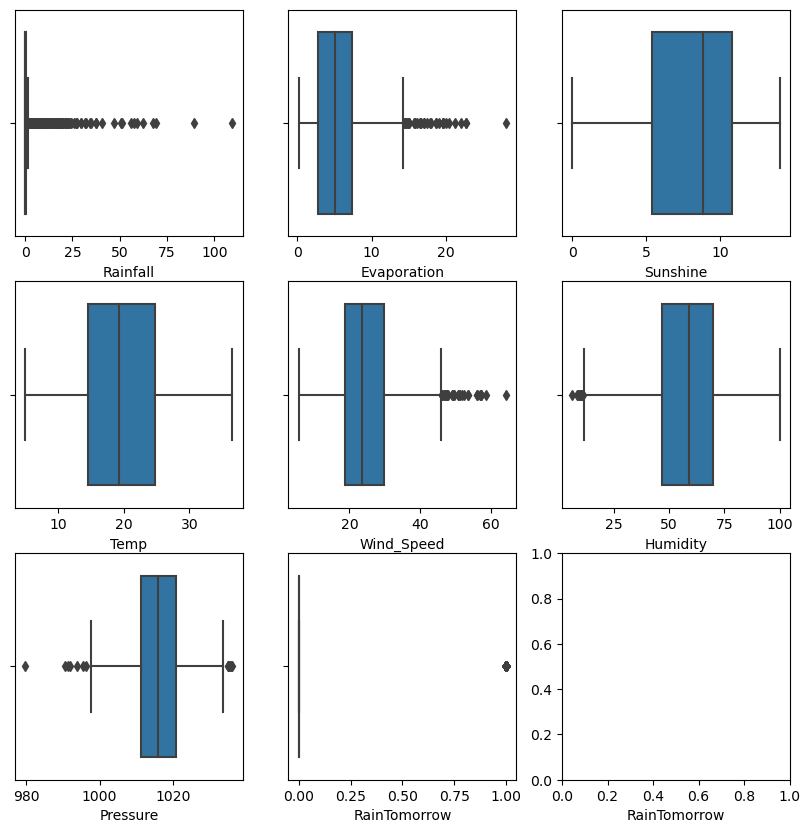

<Figure size 640x480 with 0 Axes>

In [12]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
for col,ax in zip(df.columns,ax.flatten()):
    sns.boxplot(x=df[col],ax=ax)
    plt.xlabel(col)
    
plt.show()
plt.tight_layout()

In [36]:
X = df.drop('RainTomorrow',axis=1)

q1 = X.quantile(0.25)
q3 = X.quantile(0.75)

iqr = q3 - q1

ll = q1 - (1.5 * iqr)
ul = q3 + (1.5 * iqr)


X = X[~((X < ll) | (X > ul)).any(axis=1)]

ind = list(X.index)

y = df['RainTomorrow'].iloc[ind[:n]]

df_out = pd.concat([X, y], axis=1)

In [38]:
df_out.reset_index(drop=True,inplace=True)

In [39]:
df_out.shape

(1134, 8)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is scaling required for the KNN algorithm? If yes, scale the data such that the range of each variable will be between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

- Scaling is mandatory is KNN Classification as extreme observations contribute high in distance calculations.

In [47]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X = df_out.drop('RainTomorrow',axis=1)
y = df_out['RainTomorrow']

X = pd.DataFrame(mm.fit_transform(X),columns=X.columns)
X.describe()

,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,0.066767,0.377387,0.595692,0.475500,0.444116,0.498712,0.524233
std,0.178772,0.219273,0.252973,0.201732,0.184939,0.185925,0.181388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.200000,0.437500,0.314620,0.314050,0.376420,0.397101
50%,0.000000,0.357143,0.678571,0.474152,0.421488,0.517045,0.522464
75%,0.000000,0.514286,0.783929,0.641357,0.559917,0.625000,0.646377
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Now min and max values between 0 and 1.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a 7-NN model on 70% of the data using the 'Chebyshev' distance and find its accuracy 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

kn = KNeighborsClassifier(n_neighbors=7,metric='chebyshev')
kn_model5=kn.fit(X_train,y_train)
y_train_pred = kn_model5.predict(X_train)
y_test_pred = kn_model5.predict(X_test)
print('Accuracy of model with k_neighbors 7 is for train data:', accuracy_score(y_train,y_train_pred))
print('Accuracy of model with k_neighbors 7 is for test data:', accuracy_score(y_test,y_test_pred))

Accuracy of model with k_neighbors 7 is for train data: 0.8852459016393442
Accuracy of model with k_neighbors 7 is for test data: 0.8768328445747801


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the best value of 'K' for the KNN model from the given list of values (use 5-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

K = [3, 5, 7, 9, 11, 13]

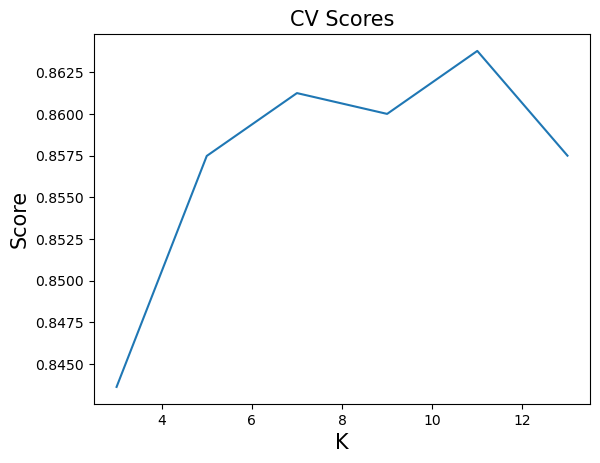

In [54]:
K = [3, 5, 7, 9, 11, 13]
scores=[]
for i in K:
    kn=KNeighborsClassifier(n_neighbors=i,p=2)
    score=cross_val_score(kn,X_train,y_train,cv=5)
    score=score.mean()
    scores.append(score)

plt.plot(K, scores)

plt.title('CV Scores', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

plt.show()

In [55]:
optimal_k = K[np.argmax(scores)]
print("Optimal value of k:", optimal_k)

Optimal value of k: 11


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a naive bayes model on 70% of the original data and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
X = df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=100, train_size=0.70)

gnb = GaussianNB()
gnb_model=gnb.fit(Xtrain,ytrain)
y_pred_tr7=gnb_model.predict(Xtrain)
y_pred_te7=gnb_model.predict(Xtest)

In [62]:
def plot_roc(model,X,y,label):
    y_pred = model.predict_proba(X)[:,1]
    auc_score = roc_auc_score(y,y_pred)
    fpr,tpr,thresh = roc_curve(y,y_pred)
    plt.plot(fpr,tpr,label=label+'(AUC Score = %0.4f)'%auc_score)
    
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    
    plt.plot([0,1],[0,1],'r--')
    
    plt.title('ROC Curve', fontsize=15)
    plt.xlabel('False positive rate (1-specificity)', fontsize=15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize=15)
    
    plt.legend(loc = 'lower right')
    
    plt.grid(True)

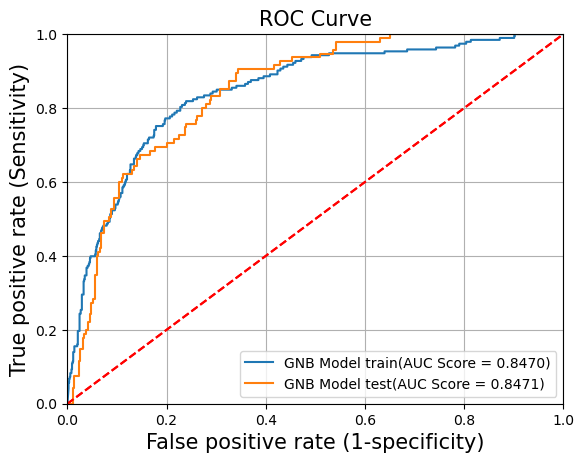

In [63]:
plot_roc(gnb_model,Xtrain,ytrain,'GNB Model train')
plot_roc(gnb_model,Xtest,ytest,'GNB Model test')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which distance metric among 'manhattan', 'euclidean' and 'chebyshev' is suitable for the given dataset? (consider K = 19)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
from sklearn.model_selection import GridSearchCV
tuning_param = ({'metric':['manhattan', 'euclidean', 'chebyshev']})

knn_model = KNeighborsClassifier(n_neighbors=19)

knn_grid = GridSearchCV(estimator=knn_model, param_grid=tuning_param, cv=3, scoring='roc_auc')
knn_grid.fit(X_train,y_train)

print('Best parameters for classifier:', knn_grid.best_params_,'\n')
print('Best observed roc_auc score:',knn_grid.best_score_)


Best parameters for classifier: {'metric': 'euclidean'} 

Best observed roc_auc score: 0.8062039549403334


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the euclidean distance between the first observation of the dataframe 'X_test_scaled' and its five neighboring points in the train set (use for loop)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [73]:
X_test.iloc[[0]]

,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure
1090,0.0,0.542857,0.792857,0.290792,0.68595,0.244318,0.613043


In [72]:
from sklearn.metrics.pairwise import euclidean_distances

# Assuming X_train_scaled and X_test_scaled are already defined

# Select the first observation from the scaled test set
test_observation = X_test.iloc[[0]]

# Find the Euclidean distances between the selected observation and all points in the scaled training set
distances = euclidean_distances(test_observation, X_train)

# Get the indices of the five nearest neighbors
nearest_neighbors_indices = distances.argsort()[0][:5]

# Print the Euclidean distances and indices of the five nearest neighbors
print(f"Euclidean distances to five nearest neighbors in the training set:")
for i, index in enumerate(nearest_neighbors_indices, 1):
    distance = distances[0, index]
    print(f"Neighbor {i}: Index {index}, Distance: {distance:.4f}")

Euclidean distances to five nearest neighbors in the training set:
Neighbor 1: Index 174, Distance: 0.2095
Neighbor 2: Index 170, Distance: 0.2314
Neighbor 3: Index 603, Distance: 0.2393
Neighbor 4: Index 294, Distance: 0.2463
Neighbor 5: Index 5, Distance: 0.2735


In [77]:
distances.argsort()[0][:5]

array([174, 170, 603, 294,   5], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the parameters obtained in Q8 to build the KNN model, and find the number of false predictions using the test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
kn=KNeighborsClassifier(n_neighbors=19,metric='euclidean')
kn.fit(X_train,y_train)
y_pred10 = kn.predict(X_test)
cm = confusion_matrix(y_test,y_pred10)
print(cm)
print('False positive predictions are:',cm[0][1])
print('False negative predictions are:',cm[1][0])

[[291   4]
 [ 40   6]]
False positive predictions are: 4
False negative predictions are: 40
